In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# PoC of drawing rectangle

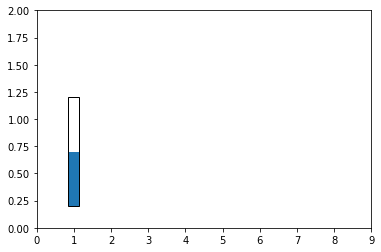

In [4]:
fig,ax = plt.subplots()
ax.set_xlim(0, 9)
ax.set_ylim(0,2)
frac=0.5
fat=0.3
height=1
x = 1-fat/2
y = 0.2
rect = Rectangle((x,y), fat, height, linewidth=1, fill=None)
ax.add_patch(rect)
ax.fill_between([x, x+fat] ,y, y+height*frac)
plt.show()

# Making it a function

In [5]:

def arrowed_spines(fig, ax):

    xmin, xmax = ax.get_xlim() 
    ymin, ymax = ax.get_ylim()

    # removing the default axis on all sides:
    for side in ['bottom','right','top','left']:
        ax.spines[side].set_visible(False)

    # removing the axis ticks
    plt.xticks([]) # labels 
    plt.yticks([])
    ax.xaxis.set_ticks_position('none') # tick markers
    ax.yaxis.set_ticks_position('none')

    # get width and height of axes object to compute 
    # matching arrowhead length and width
    dps = fig.dpi_scale_trans.inverted()
    bbox = ax.get_window_extent().transformed(dps)
    width, height = bbox.width, bbox.height

    # manual arrowhead width and length
    hw = 1./20.*(ymax-ymin) 
    hl = 1./20.*(xmax-xmin)
    lw = 1. # axis line width
    ohg = 0.3 # arrow overhang

    # compute matching arrowhead length and width
    yhw = hw/(ymax-ymin)*(xmax-xmin)* height/width 
    yhl = hl/(xmax-xmin)*(ymax-ymin)* width/height

    # draw x and y axis
    ax.arrow(xmin, ymin, xmax-xmin, 0., fc='k', ec='k', lw = lw, 
             head_width=hw, head_length=hl, overhang = ohg, 
             length_includes_head= True, clip_on = False) 

    ax.arrow(xmin, ymin, 0., ymax-ymin, fc='k', ec='k', lw = lw, 
             head_width=yhw, head_length=yhl, overhang = ohg, 
             length_includes_head= True, clip_on = False)

In [6]:
ax.arrow?

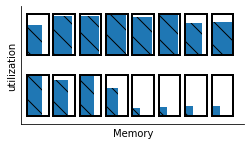

In [7]:
GPU_DOWN_BORDER = 0 #1.46*3 / 2 - 0.5
GPU_HEIGHT = 1
GPU_MAX_WIDTH = 10
SPACE = 2.2
N_GPUS = 8
SPACE_BETWEEN_GPU_SETS = 1.5
BB_LINE_WIDTH = 2

def sanitize_memory(memory_mb):
    return (memory_mb / 11019) * GPU_MAX_WIDTH
def sanitize_utilizaton(util):
    return (util/100) * GPU_HEIGHT

def add_gpu(ax, gpu_id, memory, utilization):
    memory = sanitize_memory(memory)
    utilization = sanitize_utilizaton(utilization)
    
    frac=utilization
    fat=memory
    height=GPU_HEIGHT
    x = gpu_id*(GPU_MAX_WIDTH+SPACE) #+ #GPU_MAX_WIDTH/2 -fat/2
    y = GPU_DOWN_BORDER
    
    # Bounding box:
    #x_bb = x + fat/2 - GPU_MAX_WIDTH/2 #  gpu_id*(GPU_MAX_WIDTH+SPACE) #+ GPU_MAX_WIDTH/2
    bb = Rectangle((x,y), GPU_MAX_WIDTH, GPU_HEIGHT, linewidth=BB_LINE_WIDTH, fill=None)
    
    rect = Rectangle((x,y), fat, height, linewidth=0, fill=None)
    ax.add_patch(rect)
    ax.add_patch(bb)
    ax.fill_between([x, x+fat] ,y, y+height*frac, hatch="\\", color=None, )

# fig,axes = plt.subplots(2,1, figsize=( 4, 2.16))
fig,axes = plt.subplots(1,1, figsize=( 4, 2.16))
axes = [axes]
ax = axes[0]
ax.set_xlim(0 - BB_LINE_WIDTH - 0.7, 2 + (GPU_MAX_WIDTH+SPACE)*N_GPUS + 1)
ax.set_ylim( - SPACE_BETWEEN_GPU_SETS - 0.2,  1.2*1)

data = [(7403, 73),
(9599,97),
(9901, 96),
(9917, 100),
(9823, 93),
(9819,99),
(8799,80),
(10249,82)]
for i, (mem, util) in enumerate(data):
    add_gpu(ax, i, mem, util)
    

GPU_DOWN_BORDER -= SPACE_BETWEEN_GPU_SETS
# ax = axes[1]
# ax.set_xlim(0, 2 + (GPU_MAX_WIDTH+SPACE)*N_GPUS + 1)
# ax.set_ylim(0,1.2*1)

# data = [(7640, 92),
# (7478, 83),
# (7462, 85),
# (6096, 60),
# (3976, 26),
# (3974, 10),
# (3956, 16),
# (4394, 24)] 


data = [(7680, 99),
(7516, 89),
(7500, 97),
(6159, 69),
(4016, 20),
(4014, 21),
(3996, 23),
(4434, 23)] 

for i, (mem, util) in enumerate(data):
    add_gpu(ax, i, mem, util)
    
for ax in axes:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    ax.set_xticks([])
    ax.set_yticks([])
plt.xticks([])
plt.yticks([])
plt.subplots_adjust(wspace=0, hspace=0)

ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

# axes[0].set_title("Virtual")
# axes[1].set_title("Sequential")
# arrowed_spines(fig, ax)

ax.set_xlabel("Memory")
ax.set_ylabel("utilization")
import os
os.makedirs("paper_plots", exist_ok=True)
plt.savefig('paper_plots/utilization_vis.pdf', transparent=False,)

plt.show()



In [8]:
ax.fill_between?

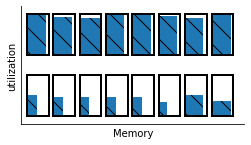

In [9]:
GPU_DOWN_BORDER = 0 #1.46*3 / 2 - 0.5
GPU_HEIGHT = 1
GPU_MAX_WIDTH = 10
SPACE = 2.2
N_GPUS = 8
SPACE_BETWEEN_GPU_SETS = 1.5
BB_LINE_WIDTH = 2

def sanitize_memory(memory_mb):
    return (memory_mb / 11019) * GPU_MAX_WIDTH
def sanitize_utilizaton(util):
    return (util/100) * GPU_HEIGHT

def add_gpu(ax, gpu_id, memory, utilization):
    memory = sanitize_memory(memory)
    utilization = sanitize_utilizaton(utilization)

    frac=utilization
    fat=memory
    height=GPU_HEIGHT
    x = gpu_id*(GPU_MAX_WIDTH+SPACE) #+ #GPU_MAX_WIDTH/2 -fat/2
    y = GPU_DOWN_BORDER

    # Bounding box:
    #x_bb = x + fat/2 - GPU_MAX_WIDTH/2 #  gpu_id*(GPU_MAX_WIDTH+SPACE) #+ GPU_MAX_WIDTH/2
    bb = Rectangle((x,y), GPU_MAX_WIDTH, GPU_HEIGHT, linewidth=BB_LINE_WIDTH, fill=None)

    rect = Rectangle((x,y), fat, height, linewidth=0, fill=None)
    ax.add_patch(rect)
    ax.add_patch(bb)
    ax.fill_between([x, x+fat] ,y, y+height*frac, hatch="\\", color=None, )

# fig,axes = plt.subplots(2,1, figsize=( 4, 2.16))
fig,axes = plt.subplots(1,1, figsize=( 4, 2.16))
axes = [axes]
ax = axes[0]
ax.set_xlim(0 - BB_LINE_WIDTH - 0.7, 2 + (GPU_MAX_WIDTH+SPACE)*N_GPUS + 1)
ax.set_ylim( - SPACE_BETWEEN_GPU_SETS - 0.2,  1.2*1)

# data = [(7403, 73),
# (9599,97),
# (9901, 96),
# (9917, 100),
# (9823, 93),
# (9819,99),
# (8799,80),
# (10249,82)]

data = [(9467, 100),
(9585,93),
(10417, 91),
(9351, 98),
(9367, 98),
(9309,97),
(9241,92),
(9833,99)]
for i, (mem, util) in enumerate(data):
    add_gpu(ax, i, mem, util)


GPU_DOWN_BORDER -= SPACE_BETWEEN_GPU_SETS
# ax = axes[1]
# ax.set_xlim(0, 2 + (GPU_MAX_WIDTH+SPACE)*N_GPUS + 1)
# ax.set_ylim(0,1.2*1)

# data = [(7640, 92),
# (7478, 83),
# (7462, 85),
# (6096, 60),
# (3976, 26),
# (3974, 10),
# (3956, 16),
# (4394, 24)]


data = [(5283, 50),
(4917, 45),
(4901, 46),
(4865, 45),
(4849, 45),
(3917, 33),
(8883, 50),
(10043, 37)]

for i, (mem, util) in enumerate(data):
    add_gpu(ax, i, mem, util)

for ax in axes:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    ax.set_xticks([])
    ax.set_yticks([])
plt.xticks([])
plt.yticks([])
plt.subplots_adjust(wspace=0, hspace=0)

ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

# axes[0].set_title("Virtual")
# axes[1].set_title("Sequential")
# arrowed_spines(fig, ax)

ax.set_xlabel("Memory")
ax.set_ylabel("utilization")
import os
os.makedirs("paper_plots", exist_ok=True)
plt.savefig('paper_plots/new_utilization_vis.pdf', transparent=False,)

plt.show()
